# EDA of Human_rights_violation_by_police_2001_2010

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/Users/tabrezkhan/Downloads/India_Crime - Copy/35_Human_rights_violation_by_police_2001_2010.csv')
df

,Area_Name,Year,Group_Name,Sub_Group_Name,Cases_Registered_under_Human_Rights_Violations,Policemen_Chargesheeted,Policemen_Convicted
0,Andhra Pradesh,2001,HR_Disappearance of Persons,01. Disappearance of Persons,0.0,0.0,0.0
1,Arunachal Pradesh,2001,HR_Disappearance of Persons,01. Disappearance of Persons,0.0,0.0,0.0
2,Assam,2001,HR_Disappearance of Persons,01. Disappearance of Persons,0.0,0.0,0.0
3,Bihar,2001,HR_Disappearance of Persons,01. Disappearance of Persons,0.0,0.0,0.0
4,Chandigarh,2001,HR_Disappearance of Persons,01. Disappearance of Persons,0.0,0.0,0.0
...,...,...,...,...,...,...,...
2262,Meghalaya,2010,HR_Total Violations by Police,12. Total (Sum of 1-11 Above),0.0,0.0,0.0
2263,Nagaland,2010,HR_Total Violations by Police,12. Total (Sum of 1-11 Above),0.0,0.0,0.0
2264,Odisha,2010,HR_Total Violations by Police,12. Total (Sum of 1-11 Above),5.0,1.0,0.0
2265,Uttar Pradesh,2010,HR_Total Violations by Police,12. Total (Sum of 1-11 Above),6.0,5.0,0.0


In [3]:
df.rename(columns = {'Area_Name':'STATE/UT'} , inplace = True)

In [4]:
df.head(5)

,STATE/UT,Year,Group_Name,Sub_Group_Name,Cases_Registered_under_Human_Rights_Violations,Policemen_Chargesheeted,Policemen_Convicted
0,Andhra Pradesh,2001,HR_Disappearance of Persons,01. Disappearance of Persons,0.0,0.0,0.0
1,Arunachal Pradesh,2001,HR_Disappearance of Persons,01. Disappearance of Persons,0.0,0.0,0.0
2,Assam,2001,HR_Disappearance of Persons,01. Disappearance of Persons,0.0,0.0,0.0
3,Bihar,2001,HR_Disappearance of Persons,01. Disappearance of Persons,0.0,0.0,0.0
4,Chandigarh,2001,HR_Disappearance of Persons,01. Disappearance of Persons,0.0,0.0,0.0


In [5]:
print('number of unique values of column Group_Name = ',len(df['Group_Name'].unique()))
print('unique values of column Group_Name  are :\n',df['Group_Name'].unique())
print('\n')
print('number of unique values of column Sub_Group_Name = ',len(df['Sub_Group_Name'].unique()))
print('unique values of column Sub_Group_Name  are :\n',df['Sub_Group_Name'].unique())

number of unique values of column Group_Name =  12
unique values of column Group_Name  are :
 ['HR_Disappearance of Persons' 'HR_Illegal detention/arrests'
 'HR_Fake encounter killings' 'HR_Violation against Terrorists/Extremists'
 'HR_Extortion' 'HR_Torture' 'HR_False implication'
 'HR_Failure in taking action' 'HR_Indignity to Women'
 'HR_Atrocities on SC/ST' 'HR_Others Violations by Police'
 'HR_Total Violations by Police']


number of unique values of column Sub_Group_Name =  12
unique values of column Sub_Group_Name  are :
 ['01. Disappearance of Persons' '02. Illegal Detention/Arrests'
 '03. Fake Encounter Killings'
 '04. Violation Against Terrorists/Extremists' '05. Extortion'
 '06. Torture' '07. False Implication' '08. Failure in Taking Action'
 '09. Indignity to Women' '10. Atrocities on SC/ST' '11. Others'
 '12. Total (Sum of 1-11 Above)']


# cleaning data

In [6]:
# Both of columns Group_Name and Sub_Group_Name are having the same data so we delete one of them
df = df.drop('Sub_Group_Name' , axis=1)

In [7]:
# now let us drop the unuseful data so we will drop rows with Total crimes as we will recalcualte them based on the sum of each column
df = df.drop(list(df[df['Group_Name']== 'HR_Total Violations by Police'].index))

In [8]:
#now let us check for missing values
df.isnull().sum()

STATE/UT                                           0
Year                                               0
Group_Name                                         0
Cases_Registered_under_Human_Rights_Violations     2
Policemen_Chargesheeted                           42
Policemen_Convicted                               74
dtype: int64

In [9]:
df = df.replace({'NULL':np.nan})

In [10]:
#let us check the percentage of missing values in each column
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage = (missing_values/len(df))*100
df_percentage = pd.concat([missing_values , percentage] , axis = 1 , keys={'missing values' ,'percentage of missing values %'})
df_percentage

,percentage of missing values %,missing values
Policemen_Convicted,74,3.604481
Policemen_Chargesheeted,42,2.045787
Cases_Registered_under_Human_Rights_Violations,2,0.097418
STATE/UT,0,0.000000
Year,0,0.000000
Group_Name,0,0.000000


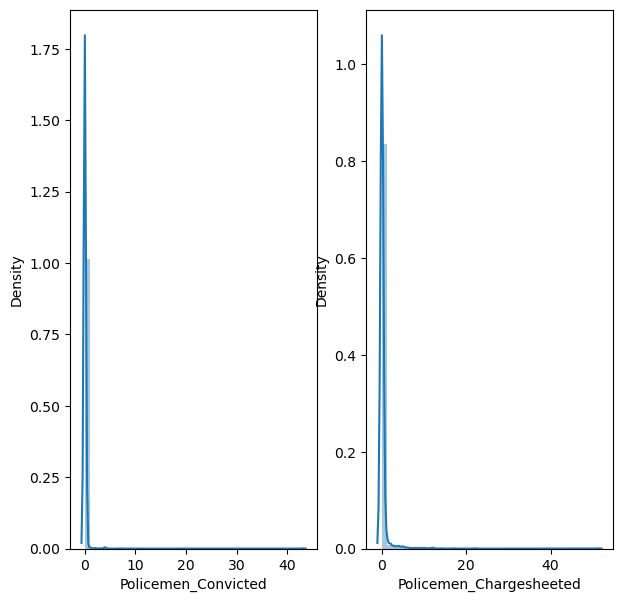

In [11]:
# let us check for outliers to decide which method we use to fill missing values :
plt.figure(figsize=(7,7))
plot = 1
for i in ['Policemen_Convicted' ,'Policemen_Chargesheeted']:
    if plot <= 2 :
        
        ax = plt.subplot(1,2,plot)
        sns.distplot(df[i])
    plot +=1
plt.show()    

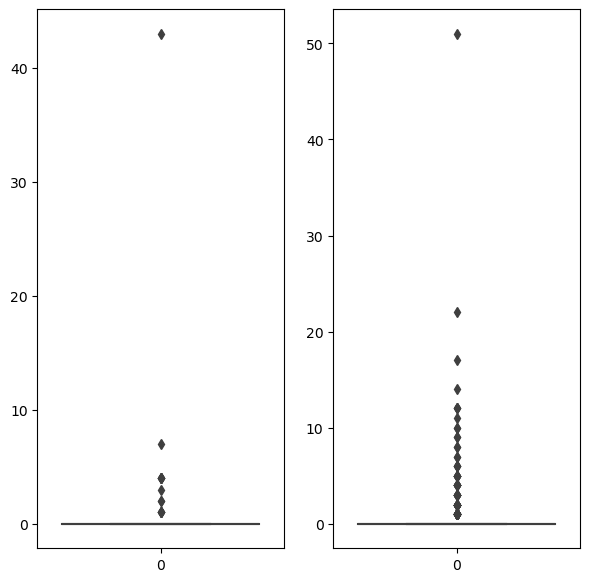

In [12]:
# let us check for outliers to decide which method we use to fill missing values :
plt.figure(figsize=(7,7))
plot = 1
for i in ['Policemen_Convicted' ,'Policemen_Chargesheeted']:
    if plot <= 2 :
        
        ax = plt.subplot(1,2,plot)
        sns.boxplot(df[i])
    plot +=1
plt.show()    

Both columns Policemen_Convicted ,Policemen_Chargesheeted are skewed to right and have outliers so we will use median method to fill missing values

In [13]:
df['Cases_Registered_under_Human_Rights_Violations'].fillna(value = round(df.groupby('STATE/UT')['Cases_Registered_under_Human_Rights_Violations'].transform('mean'),1) , inplace = True)
df['Policemen_Convicted'].fillna(value = round(df.groupby('STATE/UT')['Policemen_Convicted'].transform('median'),1) , inplace = True)
df['Policemen_Chargesheeted'].fillna(value = round(df.groupby('STATE/UT')['Policemen_Chargesheeted'].transform('median') , 1) , inplace = True)

In [14]:
df.isnull().sum()

STATE/UT                                           0
Year                                               0
Group_Name                                         0
Cases_Registered_under_Human_Rights_Violations     0
Policemen_Chargesheeted                            2
Policemen_Convicted                               17
dtype: int64

In [15]:
#let us Recheck the percentage of missing values in each column
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage = (missing_values/len(df))*100
df_new_percentage = pd.concat([missing_values , percentage] , axis = 1 , keys={'missing values' ,'percentage of missing values %'})
df_new_percentage

,percentage of missing values %,missing values
Policemen_Convicted,17,0.828057
Policemen_Chargesheeted,2,0.097418
STATE/UT,0,0.000000
Year,0,0.000000
Group_Name,0,0.000000
Cases_Registered_under_Human_Rights_Violations,0,0.000000


We notice that we removed null value as could but there are still some null values in two columns but theeir percentage are lower than 1% so we will drop them

In [16]:
df = df.dropna()

In [17]:
df.isnull().sum()

STATE/UT                                          0
Year                                              0
Group_Name                                        0
Cases_Registered_under_Human_Rights_Violations    0
Policemen_Chargesheeted                           0
Policemen_Convicted                               0
dtype: int64

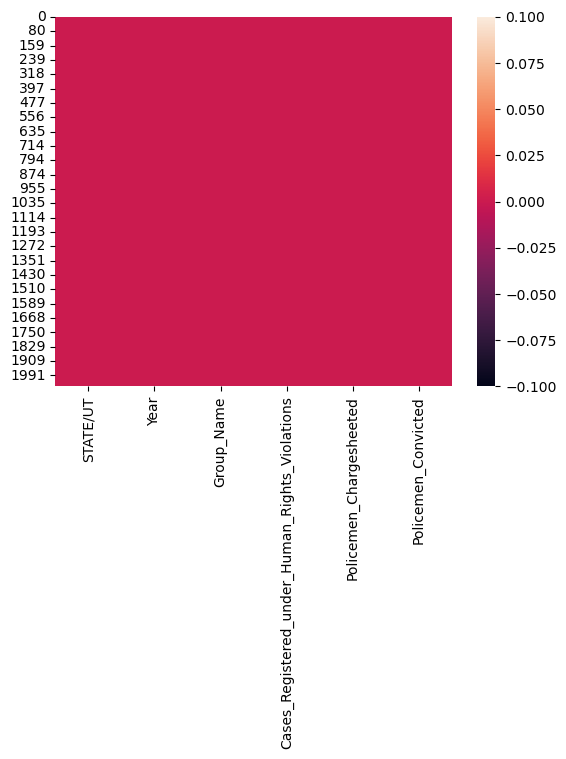

In [18]:
sns.heatmap(df.isnull())
plt.show()

There are NO missing value so we can move ahead

In [19]:
#now let us check for states that recorded zero records in all types of investigations :
df_zero = df[df['Cases_Registered_under_Human_Rights_Violations'] == 0]
df_zero

,STATE/UT,Year,Group_Name,Cases_Registered_under_Human_Rights_Violations,Policemen_Chargesheeted,Policemen_Convicted
0,Andhra Pradesh,2001,HR_Disappearance of Persons,0.0,0.0,0.0
1,Arunachal Pradesh,2001,HR_Disappearance of Persons,0.0,0.0,0.0
2,Assam,2001,HR_Disappearance of Persons,0.0,0.0,0.0
3,Bihar,2001,HR_Disappearance of Persons,0.0,0.0,0.0
4,Chandigarh,2001,HR_Disappearance of Persons,0.0,0.0,0.0
...,...,...,...,...,...,...
2047,Manipur,2010,HR_Others Violations by Police,0.0,0.0,0.0
2048,Meghalaya,2010,HR_Others Violations by Police,0.0,0.0,0.0
2049,Nagaland,2010,HR_Others Violations by Police,0.0,0.0,0.0
2050,Odisha,2010,HR_Others Violations by Police,0.0,0.0,0.0


Meghalaya            110
Himachal Pradesh     110
Nagaland             110
West Bengal          104
Odisha                99
Karnataka             98
Andhra Pradesh        97
Arunachal Pradesh     94
Gujarat               93
Jammu & Kashmir       92
Chhattisgarh          92
Bihar                 82
Maharashtra           77
Assam                 75
Manipur               75
Haryana               70
Chandigarh            66
Mizoram               55
Madhya Pradesh        54
Punjab                44
Tamil Nadu            43
Jharkhand             30
Uttar Pradesh         23
Daman & Diu           22
Kerala                11
Tripura               11
Name: STATE/UT, dtype: int64


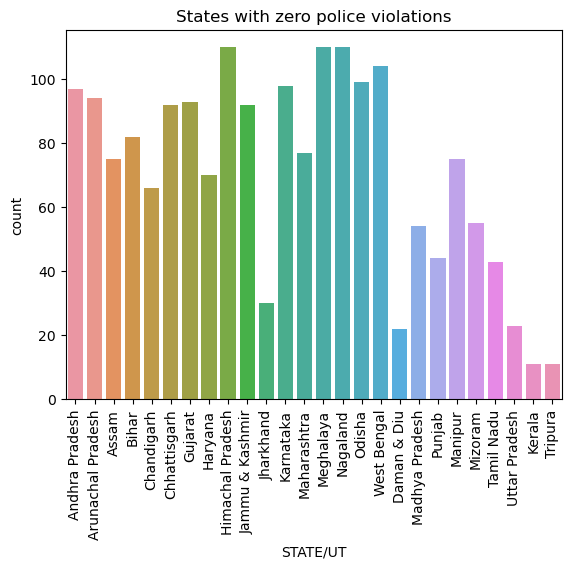

In [20]:
print(df_zero['STATE/UT'].value_counts())
sns.countplot(x = df_zero['STATE/UT'])
plt.title('States with zero police violations')
plt.xticks(rotation = 90)
plt.show()

- States Meghalaya ,Himachal Pradesh and Nagaland recorded equally the highest same number of recorded zero cases of police violations in the last decades
- Kerala and Tripura scored only 11 zero cases of violations in police station in the police stations
- The low record for all states refers to bad custody conditions in all indian states

2005    221
2007    217
2006    202
2009    186
2003    180
2004    176
2002    175
2008    171
2001    160
2010    149
Name: Year, dtype: int64


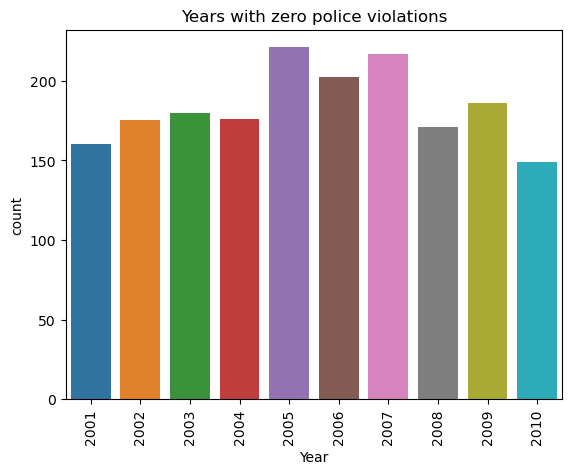

In [21]:
print(df_zero['Year'].value_counts())
sns.countplot(x = df_zero['Year'])
plt.title('Years with zero police violations')
plt.xticks(rotation = 90)
plt.show()

- Year 2005 recorded the least number of violatins by police
- 2010 recorded the least zero reported cases of violations by police
- Numbers of zero cases in ttal states of india are very low according t the massive population of the country and the scale of police

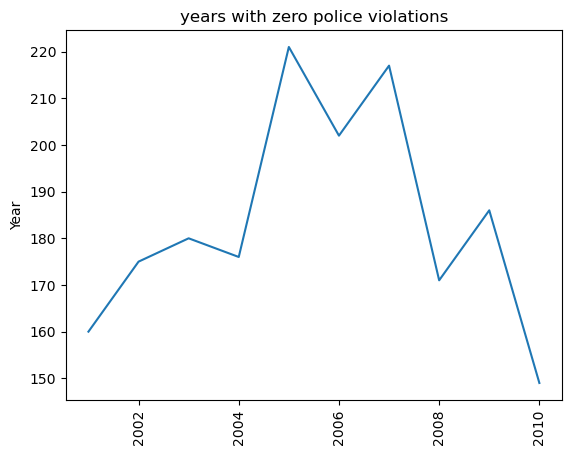

In [22]:
sns.lineplot(data = df_zero['Year'].value_counts())
plt.title('years with zero police violations')
plt.xticks(rotation=90)
plt.show()

- voilation cases of police of police decreased in the years between 2001 to 2005 to drop rapidly until 2010 which indicates a real serios human rights issues in india

HR_Disappearance of Persons                   178
HR_Failure in taking action                   178
HR_False implication                          177
HR_Fake encounter killings                    176
HR_Violation against Terrorists/Extremists    174
HR_Extortion                                  169
HR_Torture                                    167
HR_Illegal detention/arrests                  164
HR_Indignity to Women                         164
HR_Atrocities on SC/ST                        157
HR_Others Violations by Police                133
Name: Group_Name, dtype: int64


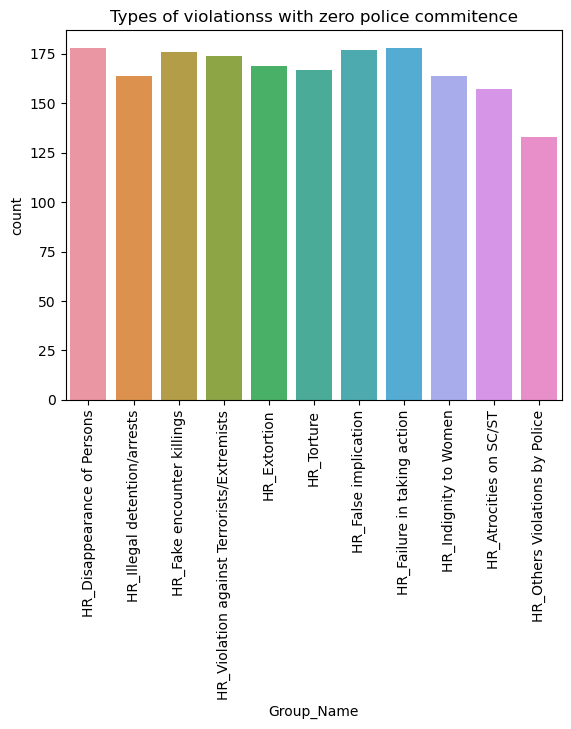

In [23]:
print(df_zero['Group_Name'].value_counts())
sns.countplot(x = df_zero['Group_Name'])
plt.title('Types of violationss with zero police commitence')
plt.xticks(rotation = 90)
plt.show()

- Disappearance of Persons and Failure in taking action cases were thr less committed by police in the last decade
- Others Violations by Police recorded the lowest number of zero reported cases in india by loice in the last decade

In [24]:
df1 = pd.read_csv('/Users/tabrezkhan/Downloads/States data.csv')
df1

,STATE/UT,population,litercay rate,Area km^2
0,A & N ISLANDS,380581,86.63%,8249
1,ANDHRA PRADESH,84580777,67.02%,162970
2,ARUNACHAL PRADESH,1383727,65.38%,83743
3,ASSAM,31205576,72.19%,78438
4,BIHAR,104099452,61.80%,94163
5,CHANDIGARH,1055450,86.05%,114
6,CHHATTISGARH,25545198,70.28%,135192
7,D & N HAVELI,343709,76.24%,491
8,DAMAN & DIU,243247,87.10%,112
9,DELHI,16787941,86.21%,1483


In [25]:
df1['Density'] = df1['population'] / df1['Area km^2']
df1

,STATE/UT,population,litercay rate,Area km^2,Density
0,A & N ISLANDS,380581,86.63%,8249,46.136623
1,ANDHRA PRADESH,84580777,67.02%,162970,518.995993
2,ARUNACHAL PRADESH,1383727,65.38%,83743,16.523495
3,ASSAM,31205576,72.19%,78438,397.837477
4,BIHAR,104099452,61.80%,94163,1105.523953
5,CHANDIGARH,1055450,86.05%,114,9258.333333
6,CHHATTISGARH,25545198,70.28%,135192,188.954953
7,D & N HAVELI,343709,76.24%,491,700.018330
8,DAMAN & DIU,243247,87.10%,112,2171.848214
9,DELHI,16787941,86.21%,1483,11320.256912


In [26]:
df['STATE/UT'].unique()

array(['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chandigarh', 'Chhattisgarh', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka',
       'Madhya Pradesh', 'Maharashtra', 'Meghalaya', 'Nagaland', 'Odisha',
       'Uttar Pradesh', 'West Bengal', 'Daman & Diu', 'Punjab',
       'Tamil Nadu', 'Manipur', 'Mizoram', 'Kerala', 'Tripura'],
      dtype=object)

In [27]:
df1['STATE/UT'].unique()

array(['A & N ISLANDS', 'ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM',
       'BIHAR', 'CHANDIGARH', 'CHHATTISGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI', 'GOA', 'GUJARAT', 'HARYANA',
       'HIMACHAL PRADESH', 'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA',
       'KERALA', 'LAKSHADWEEP', 'MADHYA PRADESH', 'MAHARASHTRA',
       'MANIPUR', 'MEGHALAYA', 'MIZORAM', 'NAGALAND', 'ODISHA',
       'PUDUCHERRY', 'PUNJAB', 'RAJASTHAN', 'SIKKIM', 'TAMIL NADU',
       'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND', 'WEST BENGAL'],
      dtype=object)

In [28]:
df['STATE/UT'] = df['STATE/UT'].str.upper()

In [29]:
df['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHANDIGARH', 'CHHATTISGARH', 'GUJARAT', 'HARYANA',
       'HIMACHAL PRADESH', 'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MEGHALAYA', 'NAGALAND', 'ODISHA',
       'UTTAR PRADESH', 'WEST BENGAL', 'DAMAN & DIU', 'PUNJAB',
       'TAMIL NADU', 'MANIPUR', 'MIZORAM', 'KERALA', 'TRIPURA'],
      dtype=object)

In [30]:
# now let us merge both of datasets :
dff = pd.merge(df,df1, on='STATE/UT',how='right') #how = 'right' we will locate df1 on the right of data
dff

,STATE/UT,Year,Group_Name,Cases_Registered_under_Human_Rights_Violations,Policemen_Chargesheeted,Policemen_Convicted,population,litercay rate,Area km^2,Density
0,A & N ISLANDS,NaN,NaN,NaN,NaN,NaN,380581,86.63%,8249,46.136623
1,ANDHRA PRADESH,2001.0,HR_Disappearance of Persons,0.0,0.0,0.0,84580777,67.02%,162970,518.995993
2,ANDHRA PRADESH,2002.0,HR_Disappearance of Persons,0.0,0.0,0.0,84580777,67.02%,162970,518.995993
3,ANDHRA PRADESH,2003.0,HR_Disappearance of Persons,0.0,0.0,0.0,84580777,67.02%,162970,518.995993
4,ANDHRA PRADESH,2004.0,HR_Disappearance of Persons,0.0,0.0,0.0,84580777,67.02%,162970,518.995993
...,...,...,...,...,...,...,...,...,...,...
2040,WEST BENGAL,2006.0,HR_Others Violations by Police,0.0,0.0,0.0,91276115,76.26%,88752,1028.440091
2041,WEST BENGAL,2007.0,HR_Others Violations by Police,2.0,0.0,0.0,91276115,76.26%,88752,1028.440091
2042,WEST BENGAL,2008.0,HR_Others Violations by Police,0.0,0.0,0.0,91276115,76.26%,88752,1028.440091
2043,WEST BENGAL,2009.0,HR_Others Violations by Police,0.0,0.0,0.0,91276115,76.26%,88752,1028.440091


In [31]:
dff.isnull().sum()

STATE/UT                                          0
Year                                              9
Group_Name                                        9
Cases_Registered_under_Human_Rights_Violations    9
Policemen_Chargesheeted                           9
Policemen_Convicted                               9
population                                        0
litercay rate                                     0
Area km^2                                         0
Density                                           0
dtype: int64

There are null values because some states are not existed as they have no useful statstics of violation cases so we will drop unuseful data

In [32]:
dff.shape

(2045, 10)

In [33]:
dff = dff.dropna()

In [34]:
# now let us check for shape
dff.shape

(2036, 10)

In [35]:
dff.isnull().sum()

STATE/UT                                          0
Year                                              0
Group_Name                                        0
Cases_Registered_under_Human_Rights_Violations    0
Policemen_Chargesheeted                           0
Policemen_Convicted                               0
population                                        0
litercay rate                                     0
Area km^2                                         0
Density                                           0
dtype: int64

our Final Dataset is clean so we can analyze it

# 2.1 Analysis of Literacy Rate vs Total Crimes

# We will indicate the summury of litercay rate based on year 2010 as we collect data based on the last census commissioner's data of 2010 as we collected data of year 2011 which is based the accumulative previous year so we will indicate our results based on year 2010 as it is the last year before making the last report of collected dataset

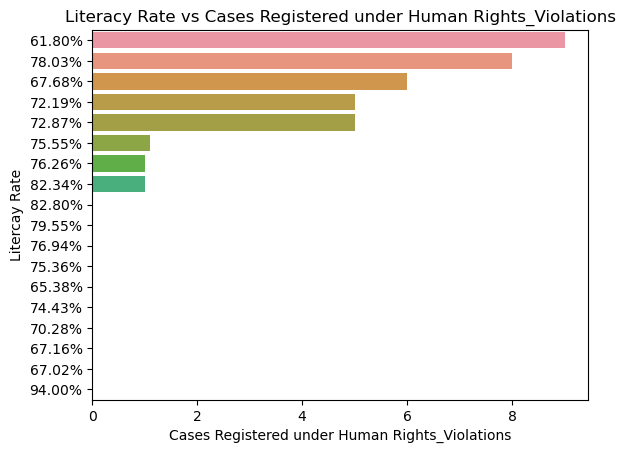

In [36]:
data = dff[dff['Year'] == 2010]
dt = data.groupby('litercay rate')['Cases_Registered_under_Human_Rights_Violations'].sum().sort_values(ascending=False).reset_index()
sns.barplot(x='Cases_Registered_under_Human_Rights_Violations' , y='litercay rate' , data=dt)
plt.title('Literacy Rate vs Cases Registered under Human Rights_Violations')
plt.xlabel('Cases Registered under Human Rights_Violations')
plt.ylabel('Litercay Rate')
plt.show()

according to year 2010 which scored the lowest recorded violatins by police we notice that violation are existed in all different literacy rates in india

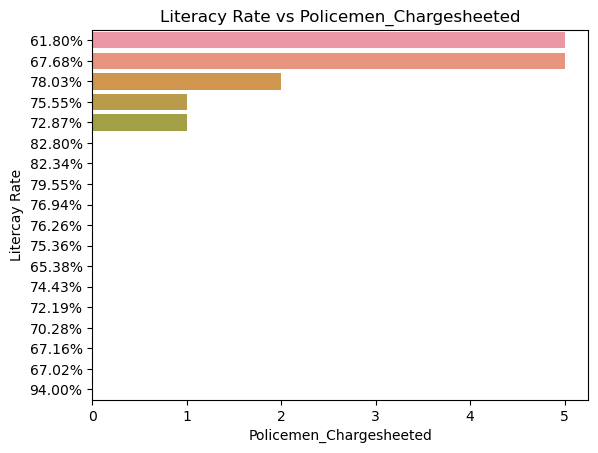

In [37]:
data = dff[dff['Year'] == 2010]
dt = data.groupby('litercay rate')['Policemen_Chargesheeted'].sum().sort_values(ascending=False).reset_index()
sns.barplot(x='Policemen_Chargesheeted' , y='litercay rate' , data=dt)
plt.title('Literacy Rate vs Policemen_Chargesheeted')
plt.xlabel('Policemen_Chargesheeted')
plt.ylabel('Litercay Rate')
plt.show()

year 2010 witnessed a very low cases of changesheeted cases by police in india but the impotant insight that they are always existed in all high or moderate or low literacy rates

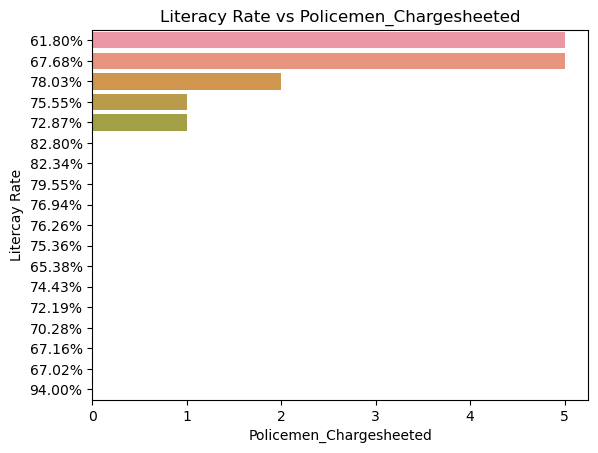

In [38]:
data = dff[dff['Year'] == 2010]
dt = data.groupby('litercay rate')['Policemen_Chargesheeted'].sum().sort_values(ascending=False).reset_index()
sns.barplot(x='Policemen_Chargesheeted' , y='litercay rate' , data=dt)
plt.title('Literacy Rate vs Policemen_Chargesheeted')
plt.xlabel('Policemen_Chargesheeted')
plt.ylabel('Litercay Rate')
plt.show()

according to year 2010 insights the changesheeted cases is not so widen in most of populations of states by the variance of there literacy rates but it is still existed

# 2.2 Analysis of the type of crime vs each state vs Literacy rate

# literacy rate vs each type of crime

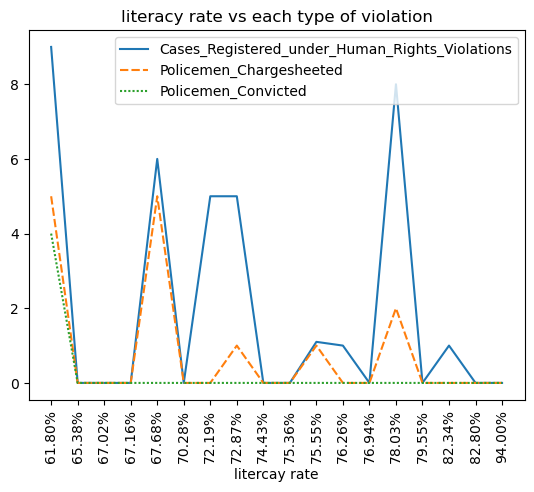

In [39]:
data = dff[dff['Year'] == 2010]
dt = data.groupby('litercay rate')[['Cases_Registered_under_Human_Rights_Violations','Policemen_Chargesheeted',                          
'Policemen_Convicted']].sum()
sns.lineplot(data = dt)
plt.title('literacy rate vs each type of violation')
plt.xticks(rotation = 90)
plt.show()

- most of states did not have violations committed by police in 2010
- the highest numbers of violations happened in societies with moderate literacy rates
- Tha ability of police to cheat are low compared to registered cases
- Most of cases of charges do not convict police

# type of crime vs each state

# We will make insights of our dataset based on all total crimes in the last decade

In [40]:
dff.columns

Index(['STATE/UT', 'Year', 'Group_Name',
       'Cases_Registered_under_Human_Rights_Violations',
       'Policemen_Chargesheeted', 'Policemen_Convicted', 'population',
       'litercay rate', 'Area km^2', 'Density'],
      dtype='object')

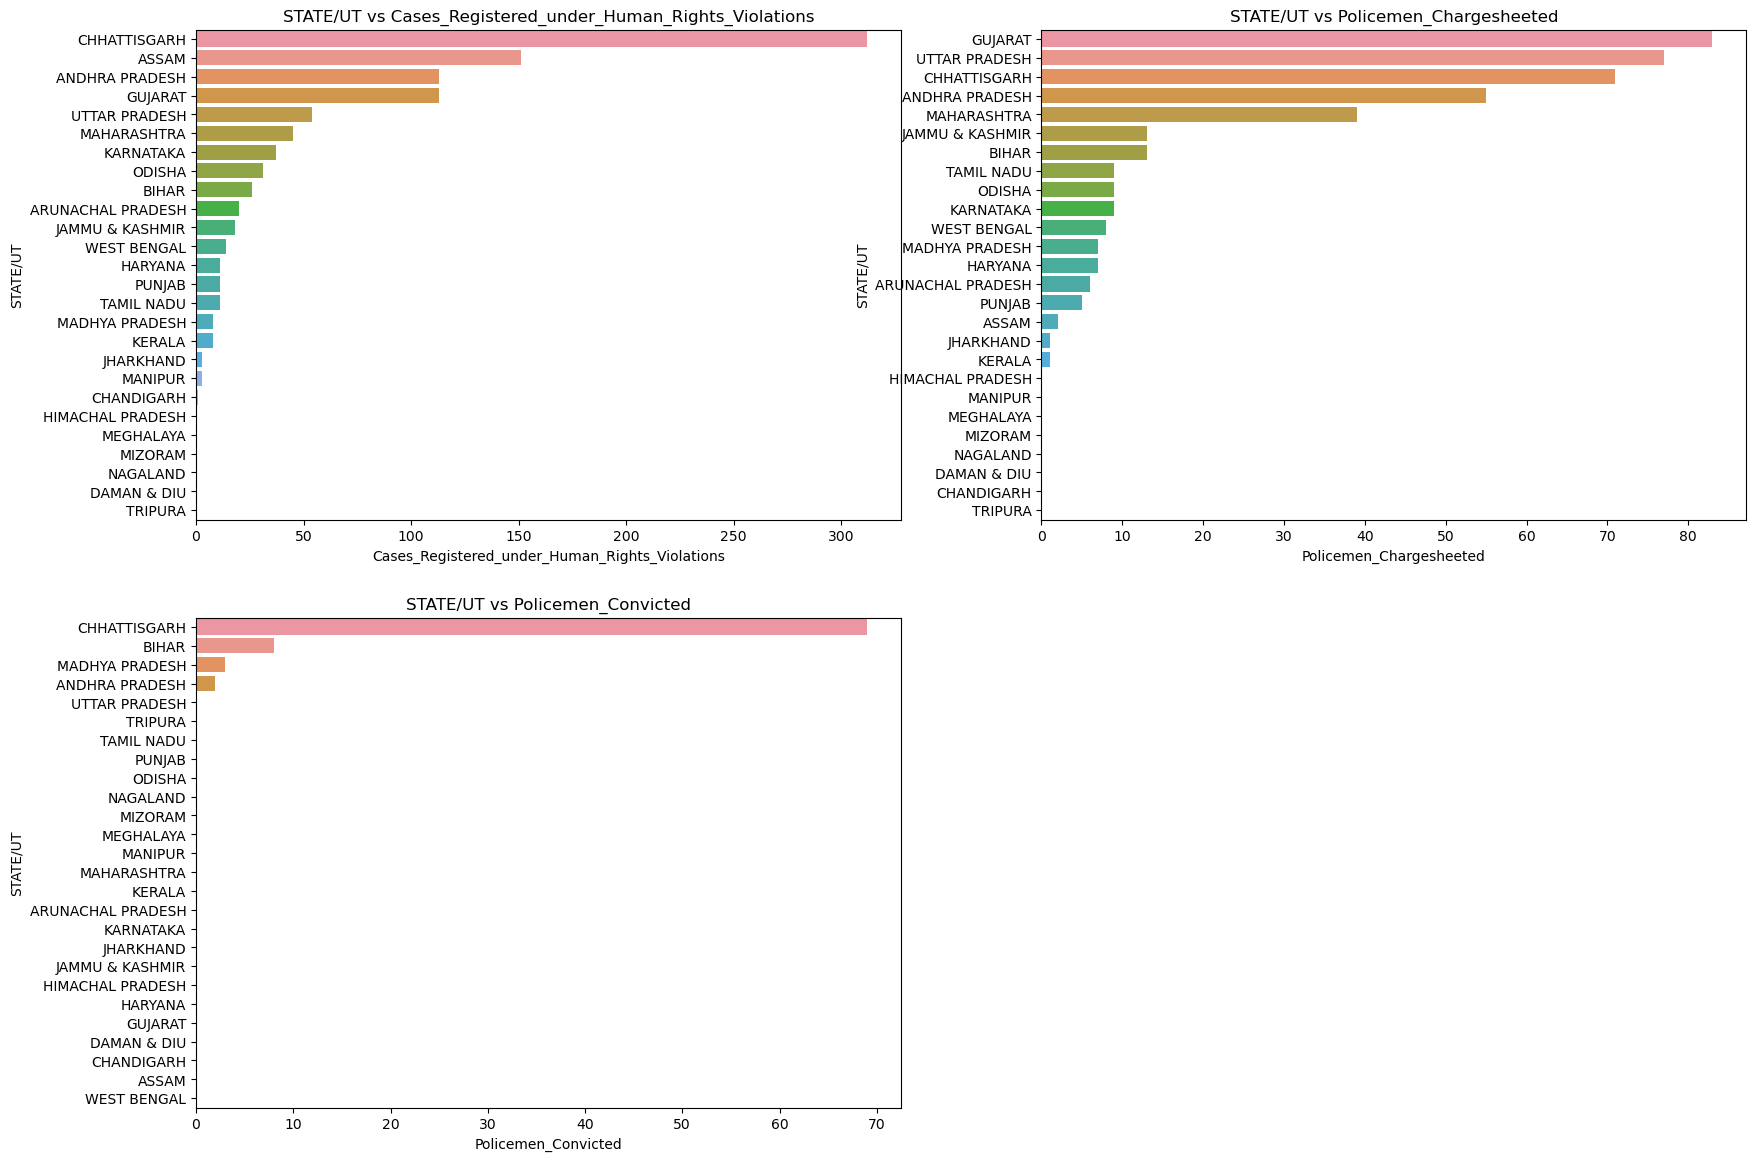

In [41]:
plt.figure(figsize=(20,14))
plot = 1
for i in ['Cases_Registered_under_Human_Rights_Violations',
       'Policemen_Chargesheeted', 'Policemen_Convicted']:
    if plot <= 3 :
        ax = plt.subplot(2,2,plot)
        dt = dff.groupby('STATE/UT')[i].sum().sort_values(ascending = False).reset_index()
        sns.barplot(x=dt[i] , y=dt['STATE/UT'])
        plt.title('STATE/UT vs {}'.format(i))
    plot +=1
plt.show()    

from the insights of last decades we found out that :
- state CHHATTISGARH recorded the highest number of police violations in india while most of states did not score violations
- state GUJARAT scored the highest number of police changesheeted among all states in india in the last decade
- state CHHATTISGARH's courts are the most charging courts that convicted police n the last decades while the vast majority of states did not convict police

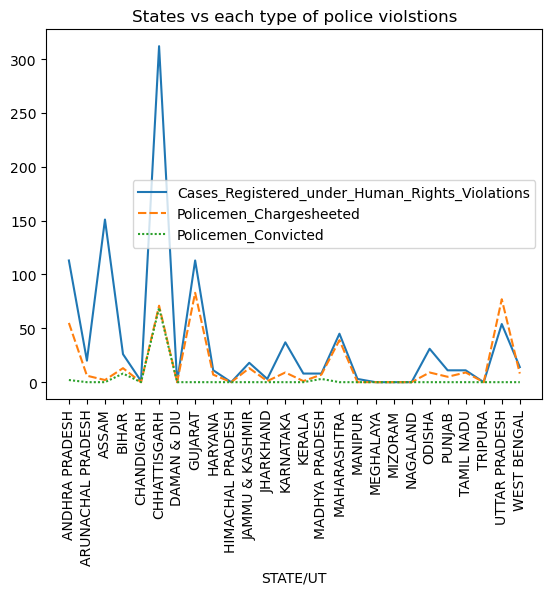

In [46]:
data_timeline = dff.groupby('STATE/UT')[['Cases_Registered_under_Human_Rights_Violations',
       'Policemen_Chargesheeted', 'Policemen_Convicted']].sum()
sns.lineplot(data = data_timeline)
plt.title('States vs each type of police violstions')
plt.xticks(rotation = 90)
plt.show()

The numbers of regitered cases of violations are highly compared to attempts of corrupting police to change sheets but at the same time we notice the very low cases of convicted police which indicated the weakness and uneffectiveness of courts in protecting descipline and the citizens from violations of the state

# Types of casualties and violations types vs total crimes

In [48]:
print(len(dff['Group_Name'].unique()))
print('\n')
print(dff['Group_Name'].unique())

11


['HR_Disappearance of Persons' 'HR_Illegal detention/arrests'
 'HR_Fake encounter killings' 'HR_Violation against Terrorists/Extremists'
 'HR_Extortion' 'HR_Torture' 'HR_False implication'
 'HR_Failure in taking action' 'HR_Indignity to Women'
 'HR_Atrocities on SC/ST' 'HR_Others Violations by Police']


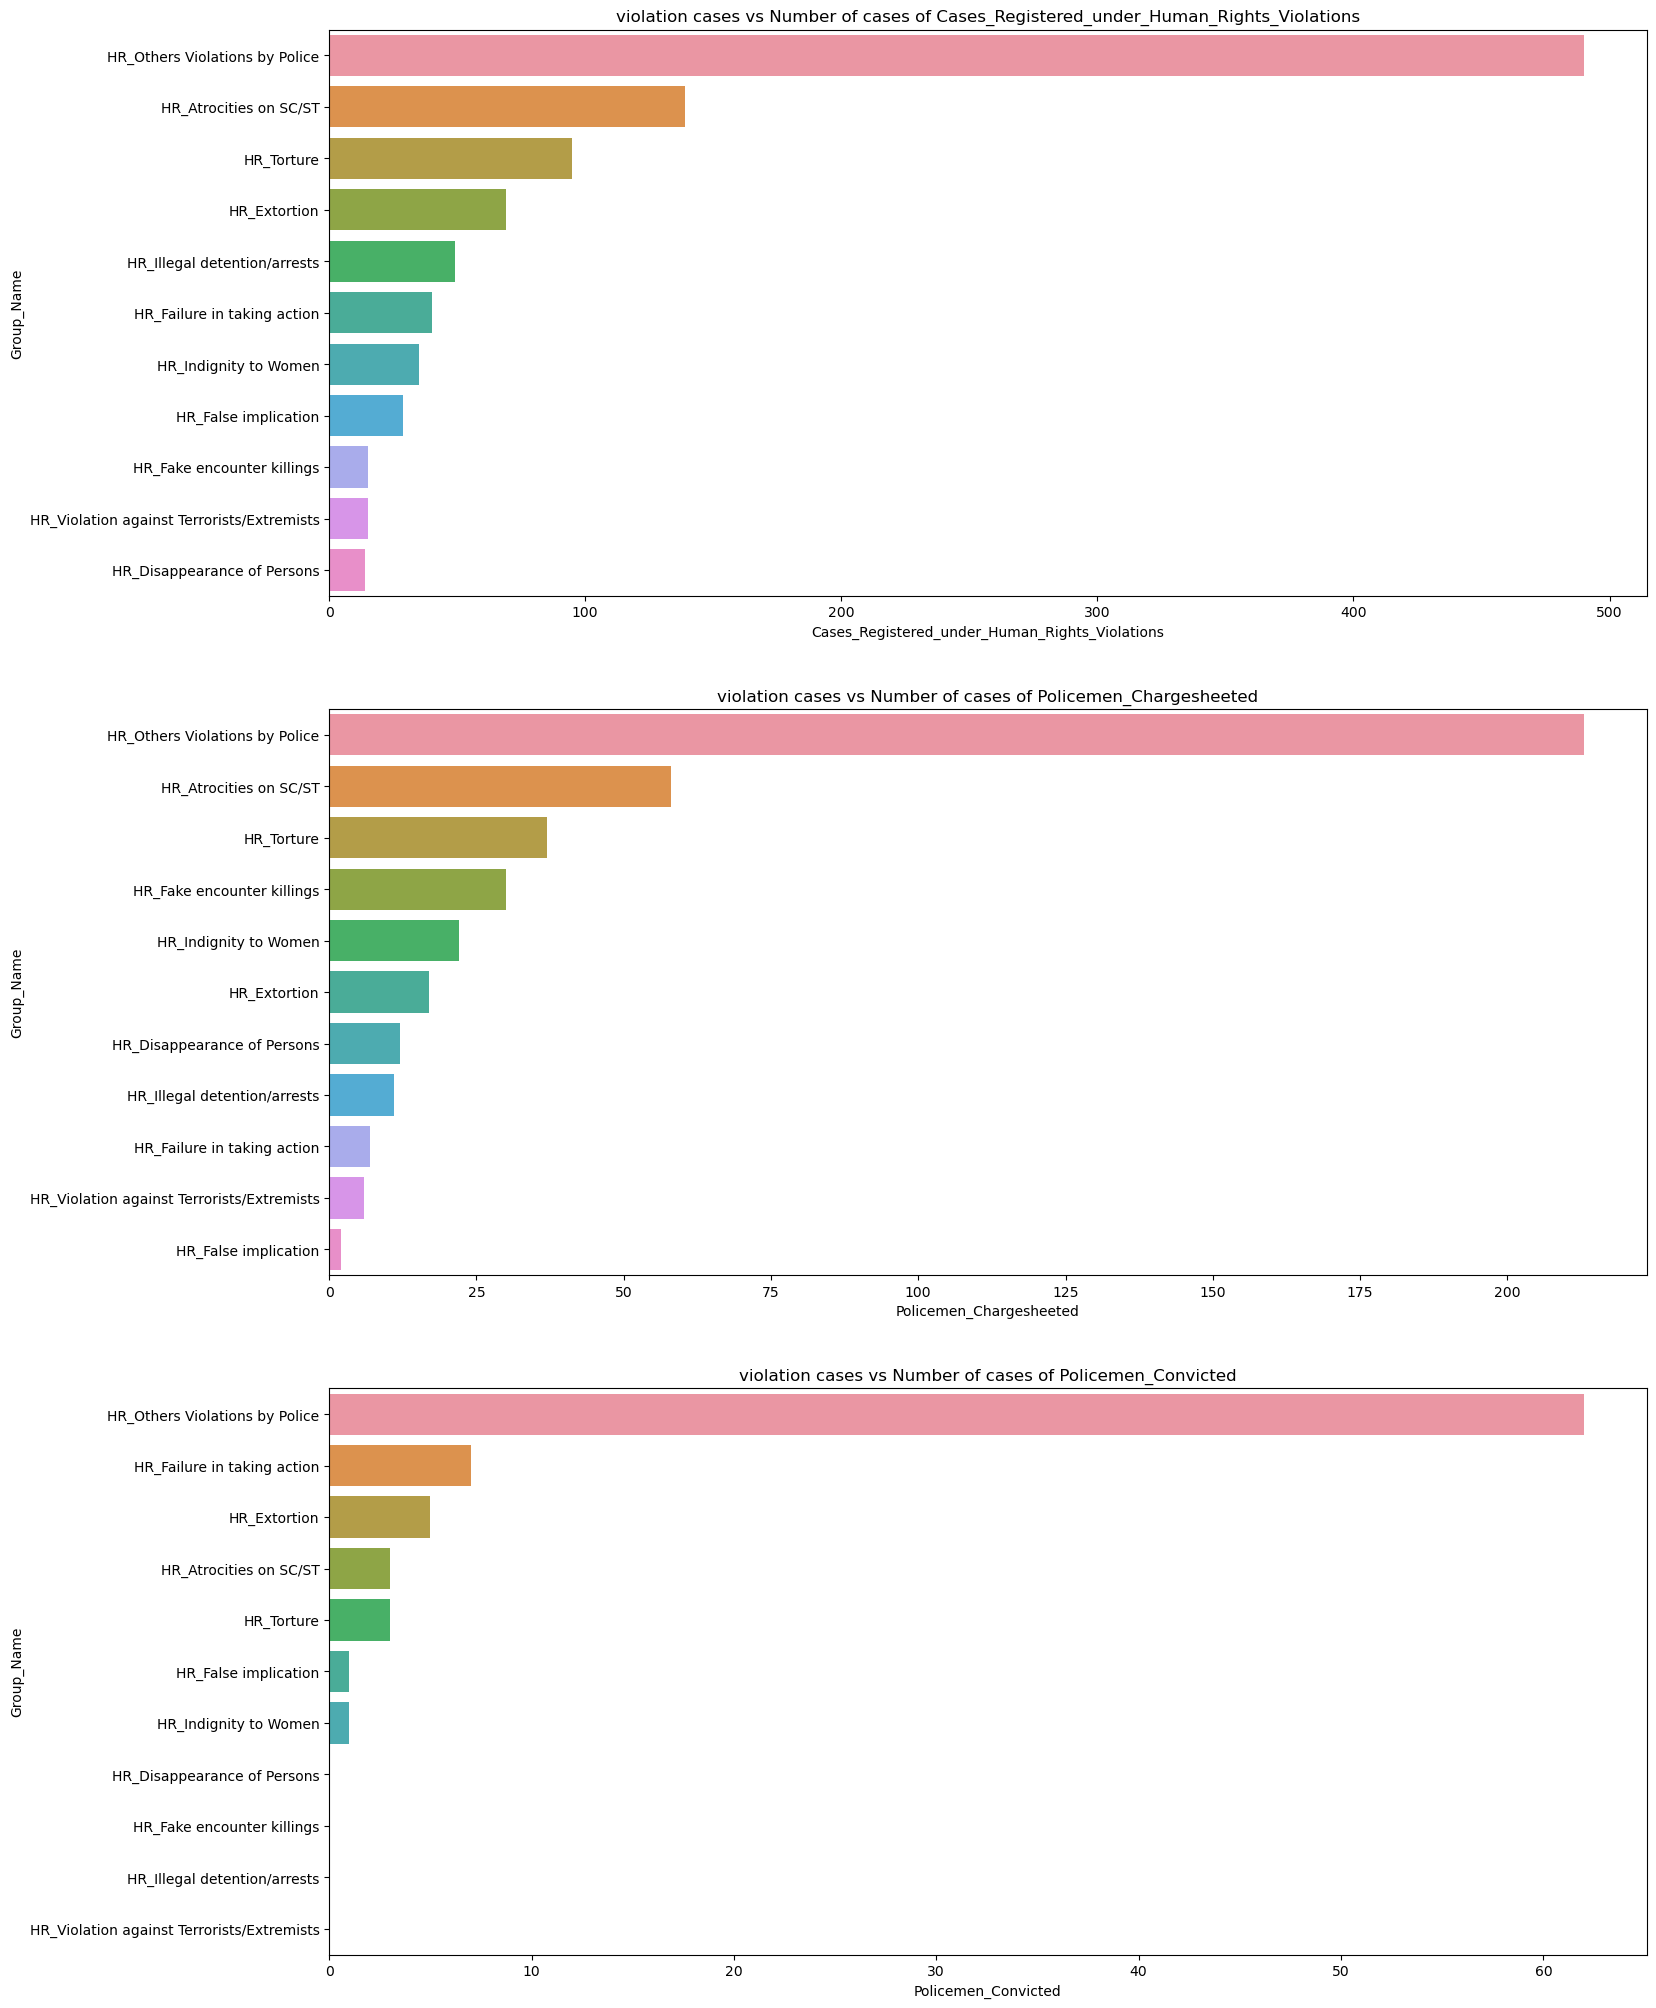

In [53]:
plt.figure(figsize=(17,25))
plot = 1
for i in ['Cases_Registered_under_Human_Rights_Violations',
       'Policemen_Chargesheeted', 'Policemen_Convicted']:
    if plot <= 3 :
        ax = plt.subplot(3,1,plot)
        dt = dff.groupby('Group_Name')[i].sum().sort_values(ascending = False).reset_index()
        sns.barplot(x=dt[i] , y=dt['Group_Name'])
        plt.title('violation cases vs Number of cases of {}'.format(i))
    plot +=1
plt.show()    

- The label case of other general violations of police in public streets and riots are the most dominant violating cases in registerd and cheating and also convicted in courts in india in the last decade while crimes against ST and SC communities are the second types of violations to be registered and also cheated by police
- casualties of enforced disappearance , Fake encounter Killings and illegal detentions against either normal citizens or Terrorists and extremists are the least convicted in courts
- Torture cases have a bad record in conviting police with them in indian courts in the last decade


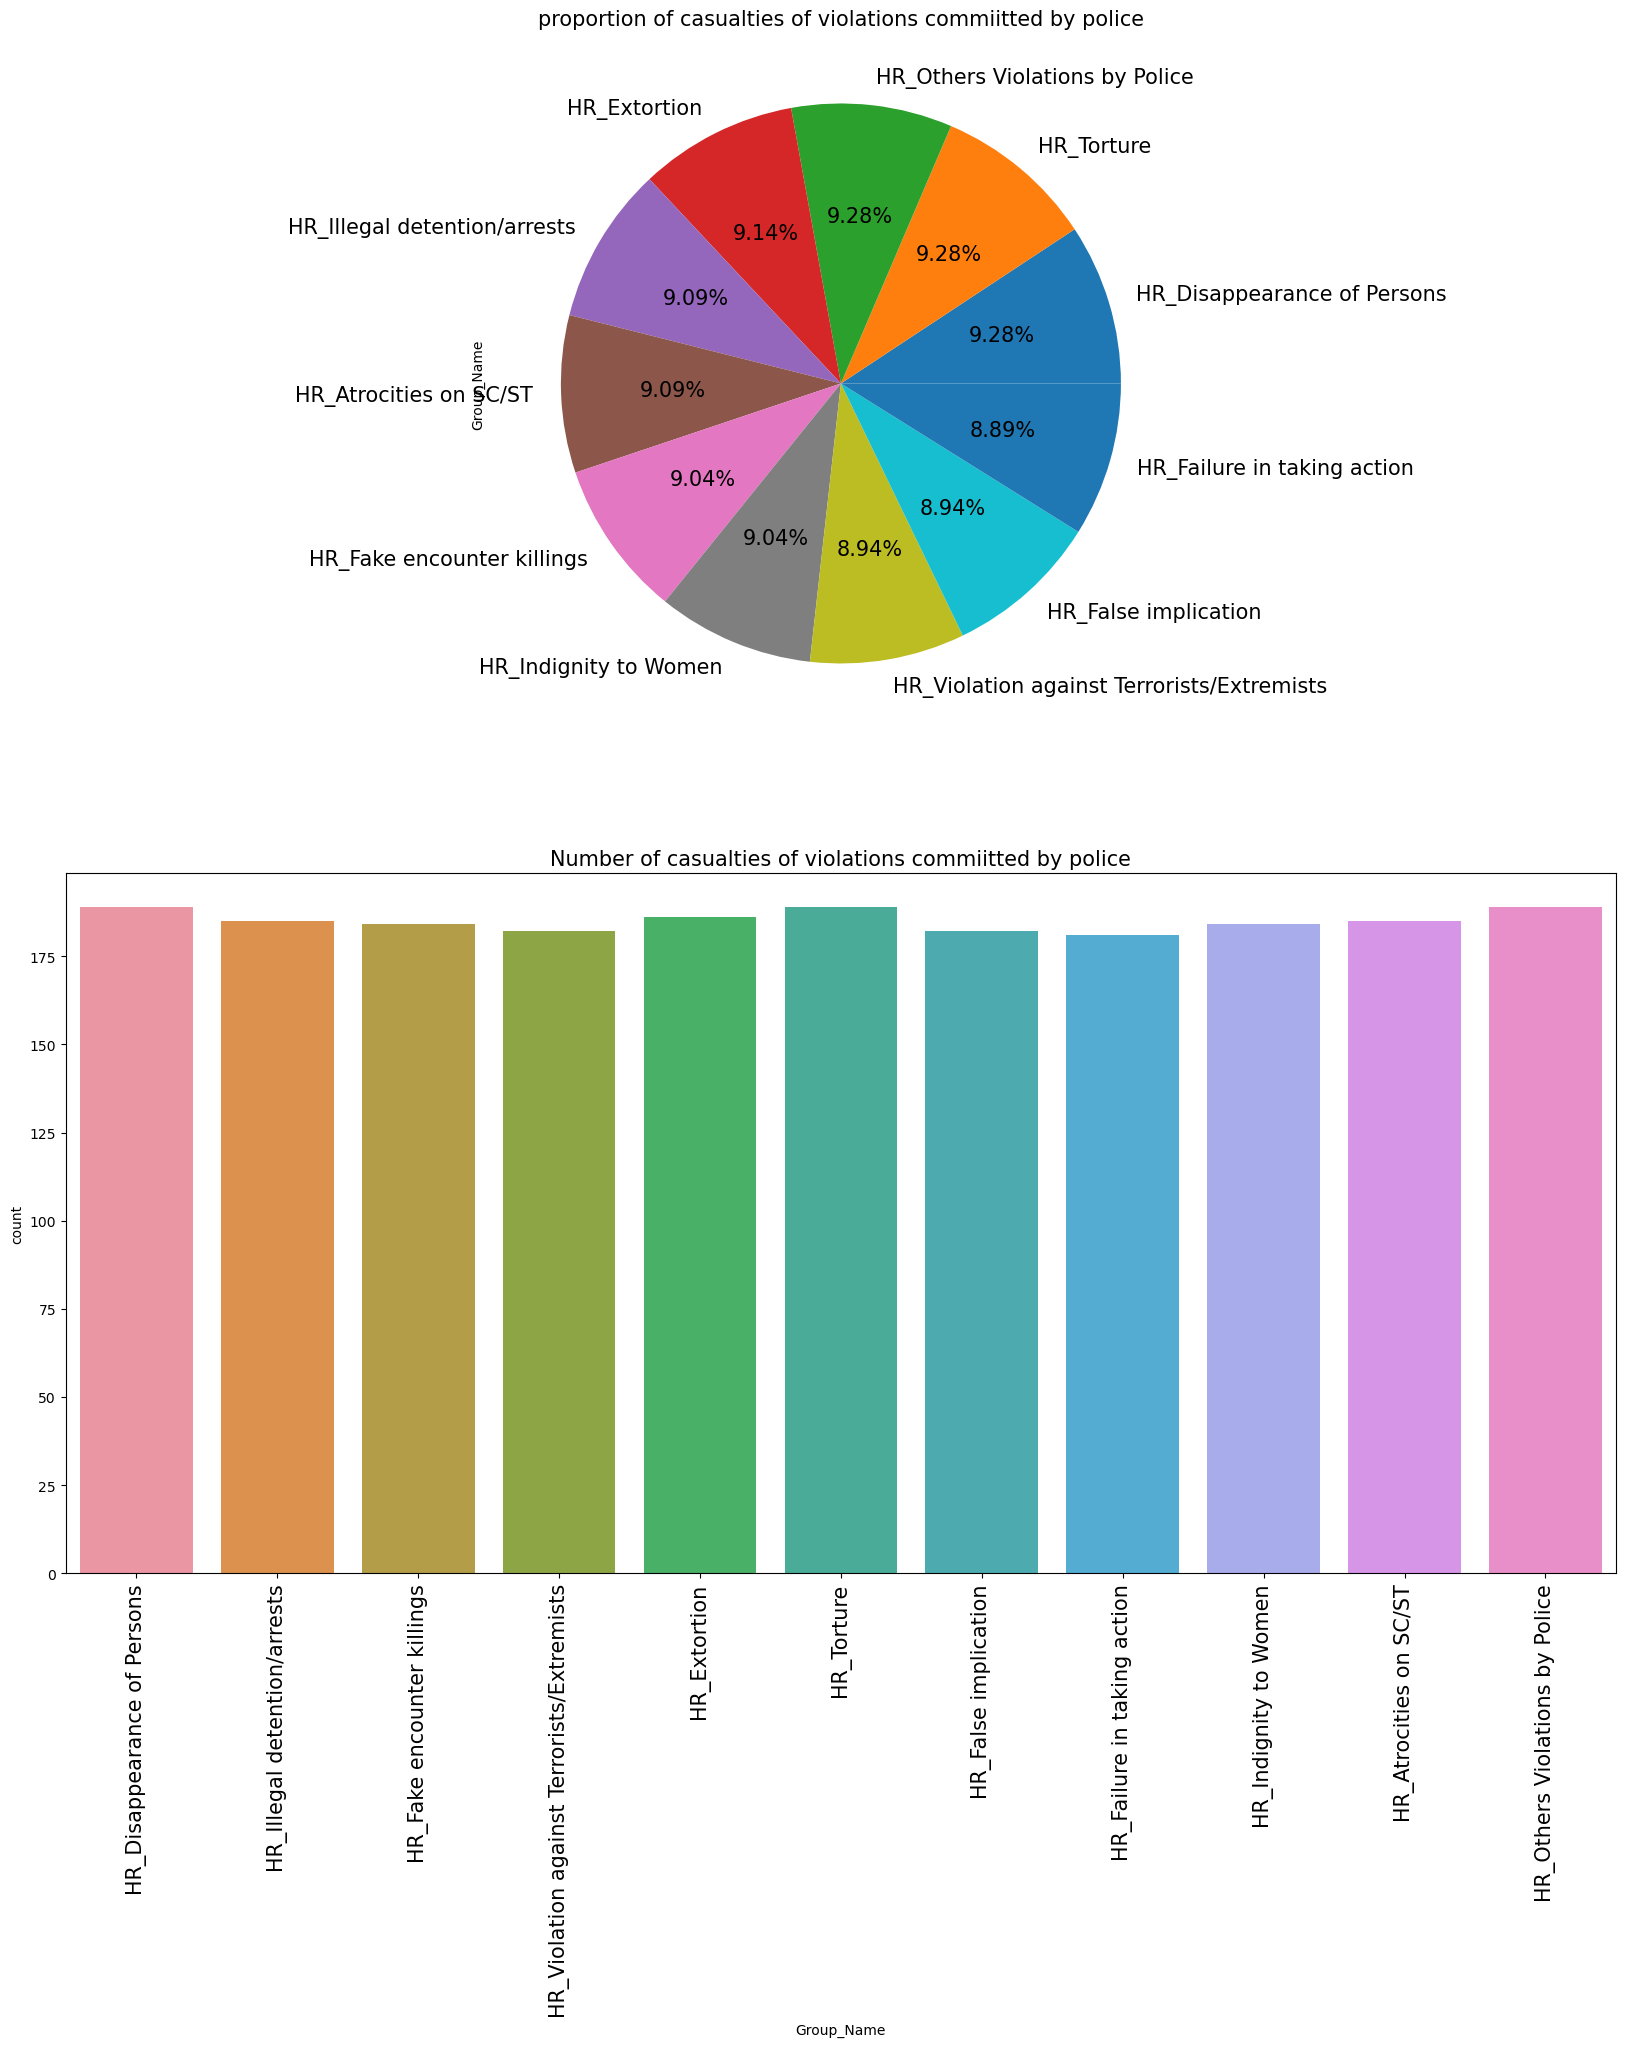

In [66]:
figure , axx = plt.subplots(2,1,figsize=(20,20))
sns.countplot(x = dff['Group_Name'] , ax = axx[1])
axx[1].set_title('Number of casualties of violations commiitted by police', fontsize=15)

dff['Group_Name'].value_counts().plot(kind='pie' , autopct='%0.2f%%' , ax=axx[0] , fontsize=15)
axx[0].set_title('proportion of casualties of violations commiitted by police', fontsize=15)
plt.xticks(rotation=90 , fontsize=15)
plt.show()

Tortue and Dissapearance of persons are the most committed violations by police in india in the last decade while failure of taking proportionate actions by police in dangerous situations are the least committed

# 2.3 Analysis of year-on-year total crime rate

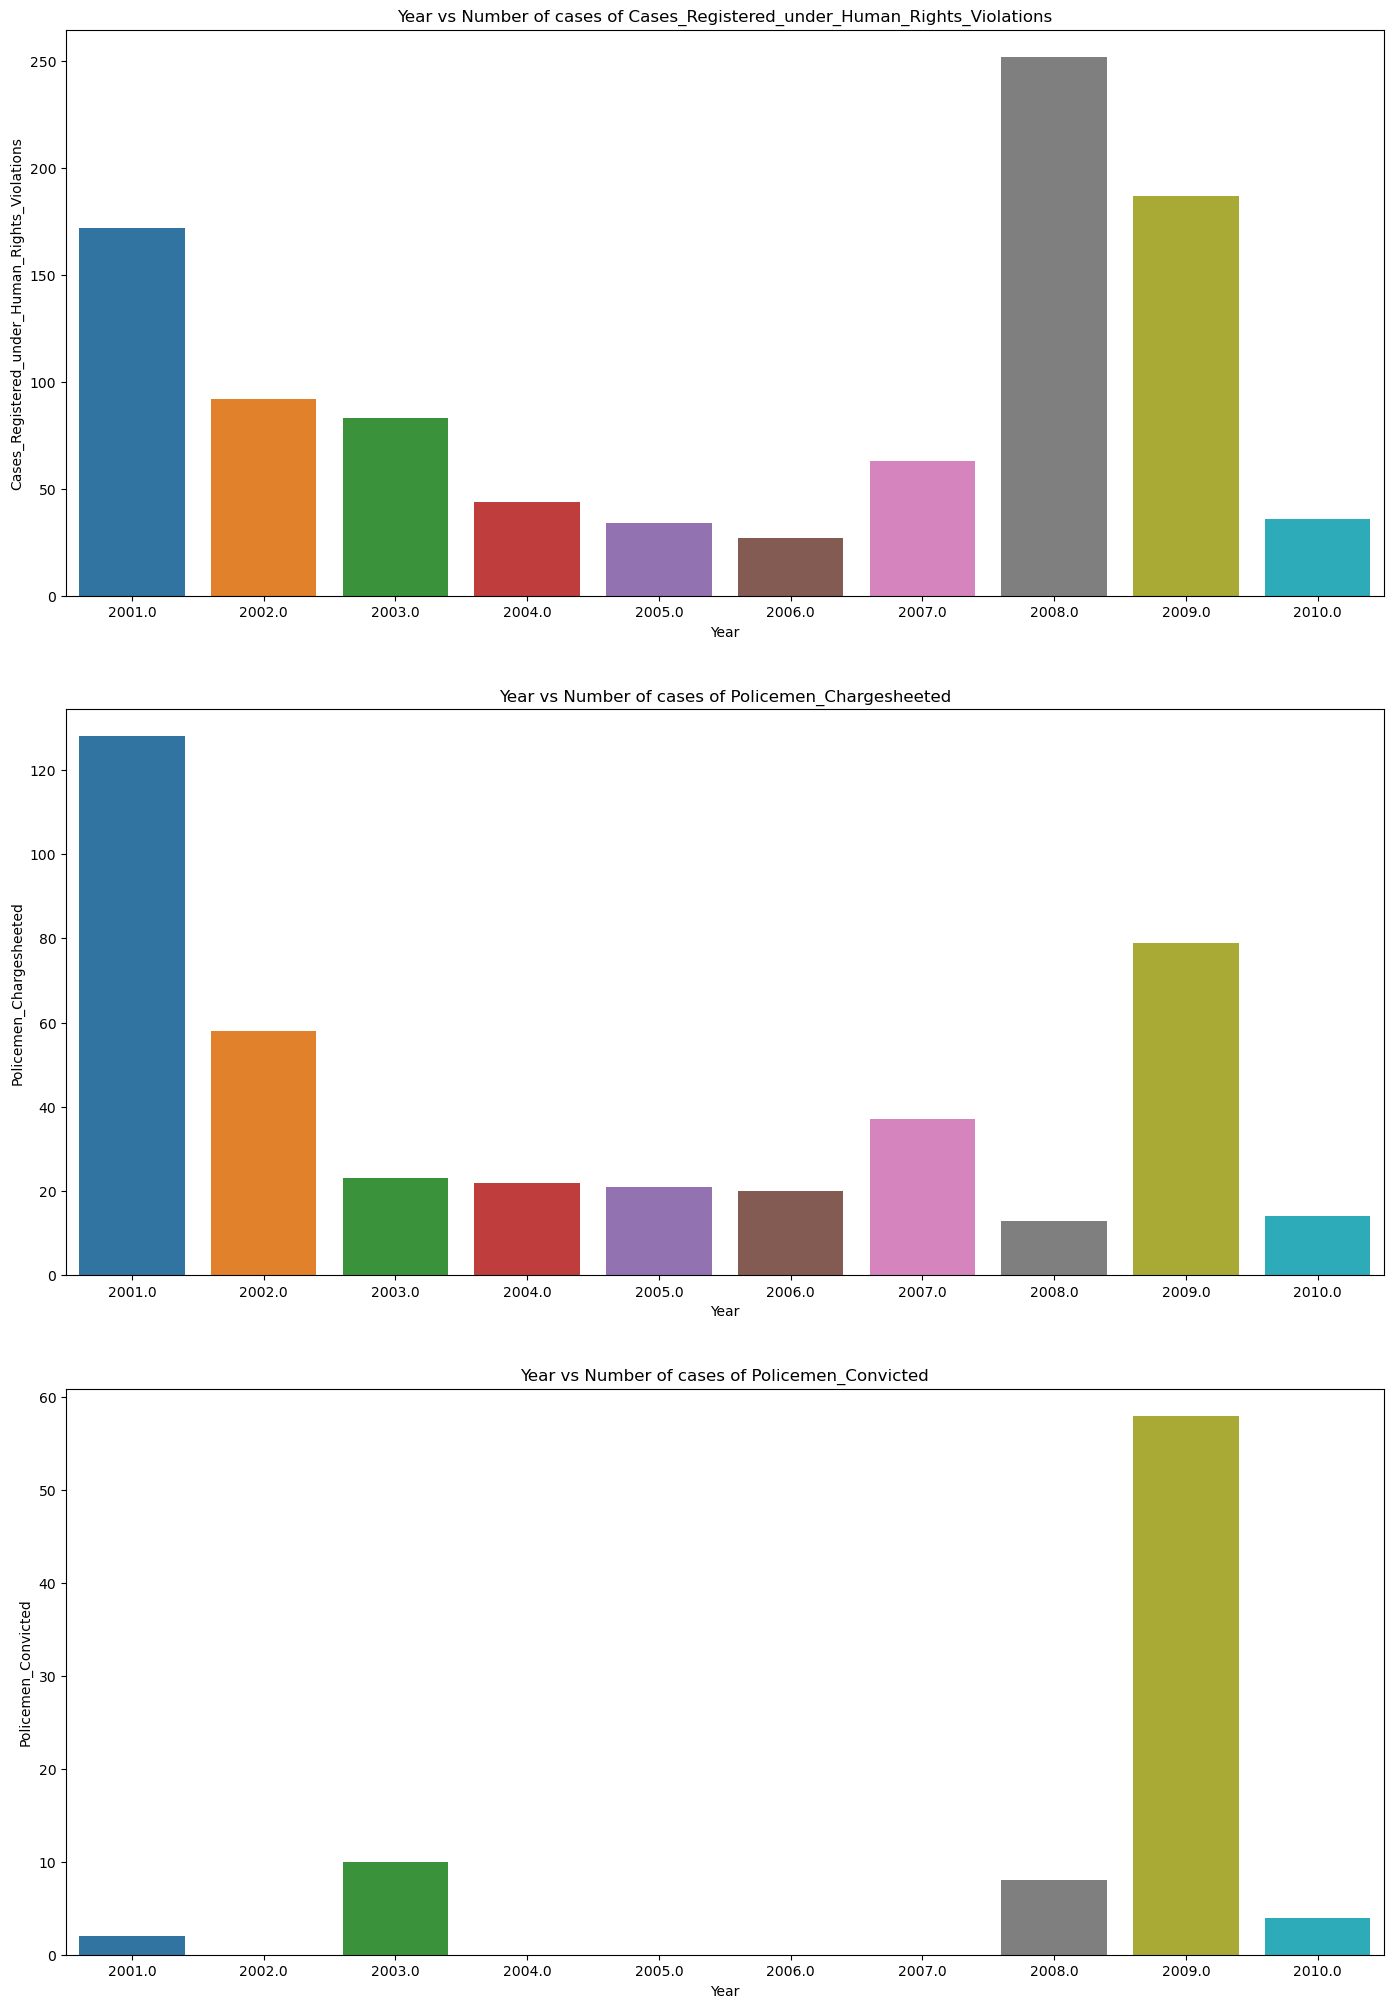

In [69]:
plt.figure(figsize=(17,25))
plot = 1
for i in ['Cases_Registered_under_Human_Rights_Violations',
       'Policemen_Chargesheeted', 'Policemen_Convicted']:
    if plot <= 3 :
        ax = plt.subplot(3,1,plot)
        dt = dff.groupby('Year')[i].sum().sort_values(ascending = False).reset_index()
        sns.barplot(y=dt[i] , x=dt['Year'])
        plt.title('Year vs Number of cases of {}'.format(i))
    plot +=1
plt.show()    

- year 2008 recorded the highest numbers of registered cases of police violations against citizens in india while 2006 was the lowest 
- 2001 recorded the highest cases of corruption of police by changing sheets of cases th hide violations while 2008 was the least in police's corruption rates
- 2009 witnessed the highest number of convicted cases in courts against police while years 2004 to 2007 recorded zero cases of convictions which is the worst at all for india in the last decade

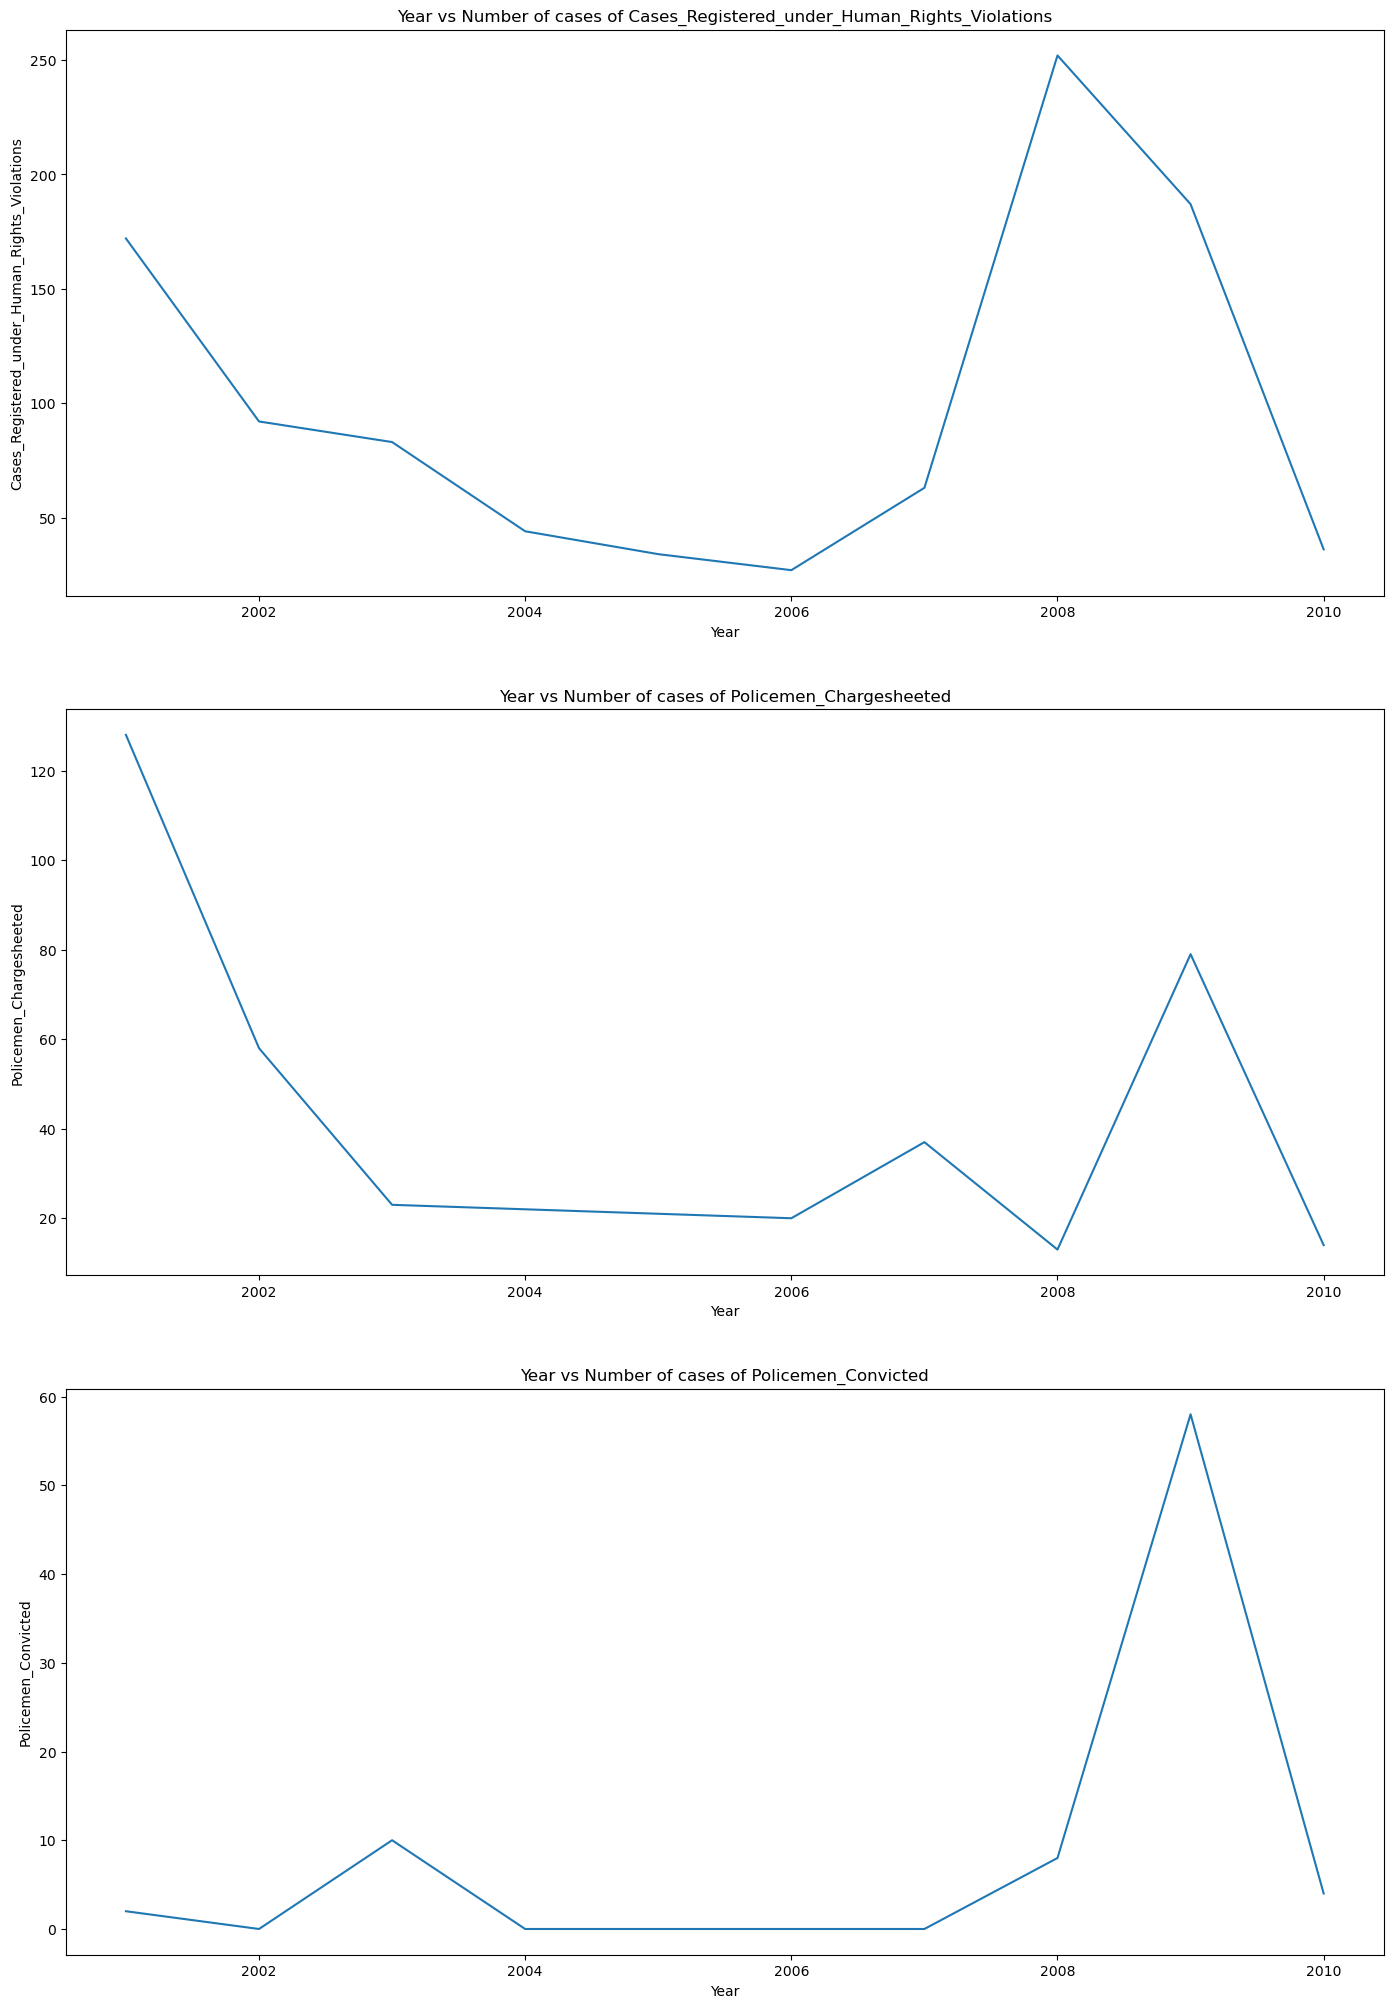

In [71]:
plt.figure(figsize=(17,25))
plot = 1
for i in ['Cases_Registered_under_Human_Rights_Violations',
       'Policemen_Chargesheeted', 'Policemen_Convicted']:
    if plot <= 3 :
        ax = plt.subplot(3,1,plot)
        dt = dff.groupby('Year')[i].sum()
        sns.lineplot(data = dt)
        plt.title('Year vs Number of cases of {}'.format(i))
    plot +=1
plt.show()    

- Integrity in registering cases and revealing violations of police decreased in years between 2001 to 2006 and incresed again to reach its peak in 2008 to drop rapidly in 2010 in  a sudden deterioration
- attempts of cheating by police in cases decreased in the period 2001 - 2006 when the country witnessed the decreasing rate of registering crimes to increase but not too much in 2008 which witnessed a kind of rising in police's performance
- Years 2009 considered the worst in sudden deterioration in police's performance as the number of registered cases against police were decreasing , the cheated cases of changesheeted we increasing compared to the previous rates
- courts of india were poorly capable of convicting police's violation cases in the last decade despite of scoring more than 50 cases of conviction in 2009 but it is a very low poor number compared to the massive population of the country

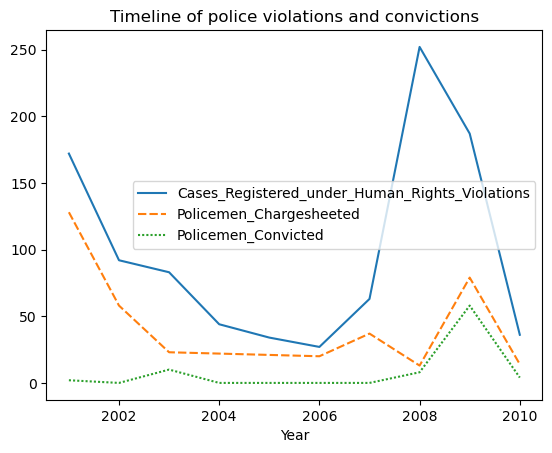

In [73]:
dat = dff.groupby('Year')[['Cases_Registered_under_Human_Rights_Violations',
       'Policemen_Chargesheeted', 'Policemen_Convicted']].sum()
sns.lineplot(data = dat)
plt.title('Timeline of police violations and convictions')
plt.show()

in the last decade the number of convicted police violation cases are very low compared to registered cases and that refers to The lacking of integrity of police and non proficiency of courts of law in protecting society from the state's violations

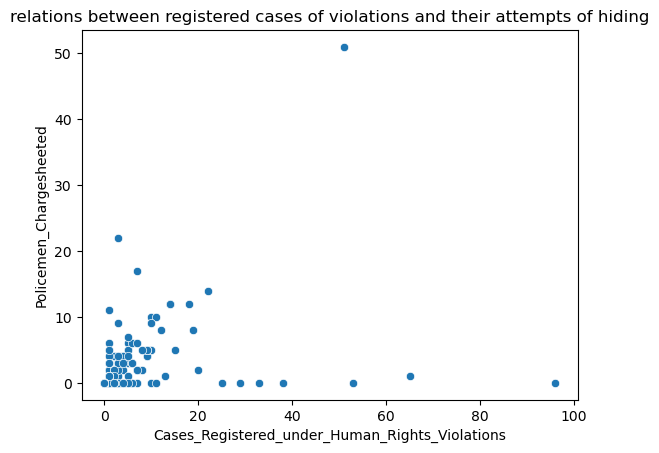

In [75]:
sns.scatterplot(x = dff['Cases_Registered_under_Human_Rights_Violations'] , y=dff['Policemen_Chargesheeted'])
plt.title('relations between registered cases of violations and their attempts of hiding')
plt.show()

The poor relation between registered cases against of police and attempts of cheating reflects the severe lack of integrity and profficiency of police in india in the last decade

# 2.4 Analysis of area vs overall crime

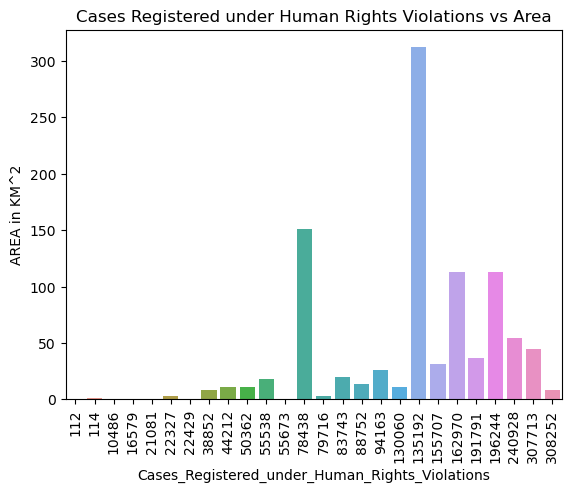

In [76]:
dt = dff.groupby('Area km^2')['Cases_Registered_under_Human_Rights_Violations'].sum().sort_values(ascending=False).reset_index()
sns.barplot(y='Cases_Registered_under_Human_Rights_Violations' , x='Area km^2' , data=dt)
plt.title('Cases Registered under Human Rights Violations vs Area')
plt.xlabel('Cases_Registered_under_Human_Rights_Violations')
plt.ylabel('AREA in KM^2')
plt.xticks(rotation=90)
plt.show()

in most of states The more the Area increased the more cases of violations by police were committed  so we jump to a final conclusion that the cases if violations and crimes increased in wide areas that has a massive population in a country like india

# 2.5 Analysis of Population vs overall Crime

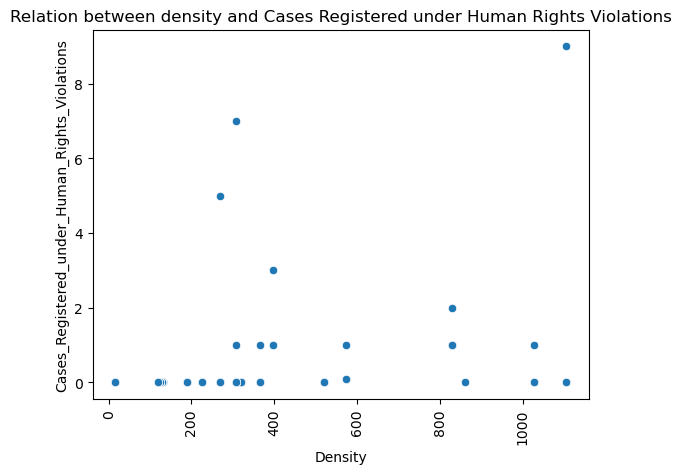

In [77]:
data = dff[dff['Year'] == 2010]
popu = data[['Density','Cases_Registered_under_Human_Rights_Violations']].sort_values(by='Density' , ascending=False).reset_index()
sns.scatterplot(x=popu['Density'] , y=popu['Cases_Registered_under_Human_Rights_Violations'] )
plt.title('Relation between density and Cases Registered under Human Rights Violations')
plt.xticks(rotation=90)
plt.show()

Most of areas with density above 400 persons per km^2  recorded cases in year 2010 which refers to the possibility of police violations in all areas with different social conditions in india which open the gate of questions about the profficiency of police in dealing with different environments , publicity and conditions